In [2]:
#By Brittany Nguyen, Belle Tran, and Ally Motter

###Description: This project involves the use of Python's pandas, numpy, and plotly packages to produce visualizations to further understand
###...the NYC job market, from distribution of agencies to salary range trends.  Additionally, it includes utilizing a ML classifier
###...Decision Tree to make predictions as to an employee's career level given a certain salary value input.  This is supervised, classification-based learning.

import pandas as pd
import numpy as np

In [3]:
##https://catalog.data.gov/dataset/nyc-jobs-26c80 
##Data set used is from Data.gov, titled nyc-jobs.

In [4]:
jobs = pd.read_csv('NYC_Jobs (4).csv')

In [5]:
jobs.head(5)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,389467,NYC HOUSING AUTHORITY,Internal,1,DEPUTY DIRECTOR - Strategic Initiatives &Anal...,ADMINISTRATIVE CITY PLANNER,Competitive-1,10053,M1,"Finance, Accounting, & Procurement Policy, Res...",F,Manager,56990.0,156829.0,Annual,Budget-Office Of Director,Financial Planning & Analysis,Please read this posting carefully to make cer...,1. A baccalaureate degree from an accredited c...,â¢\tMinimum 5 years of professional experienc...,APPOINTMENT TO THIS POSITION WILL BE MADE ON A...,Click the apply now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,05/21/2019,NaN,05/21/2019,10/20/2020
1,442559,NYC HOUSING AUTHORITY,External,100,CARETAKER X (HA),CARETAKER (HA),Labor-3,90645,00,Building Operations & Maintenance,F,Entry-Level,30909.0,44930.0,Annual,DMP-Contract & Analysis Unit,Dept of Management & Planninng,"1.\tDrive development vehicles, and assist in ...",Qualification Requirements There are no forma...,NaN,NYCHA residents are encouraged to apply.,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,09/04/2020,NaN,09/04/2020,10/20/2020
2,441615,NYC HOUSING AUTHORITY,External,1,Housing Development Construction Coordinator,ASSOCIATE HOUSING DEVELOPMENT,Competitive-1,22508,00,"Engineering, Architecture, & Planning",F,Experienced (non-manager),74650.0,109409.0,Annual,Real Estate Development,Business Operations,"In December 2018, Mayor de Blasio and New York...",1.A baccalaureate degree from an accredited co...,â¢\tExperience in affordable housing developm...,"1.\tNYCHA employees applying for promotional, ...",Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,07/15/2020,NaN,07/21/2020,10/20/2020
3,221045,NYC EMPLOYEES RETIREMENT SYS,Internal,1,CERTIFIED IT ADMINISTRATOR (WAN),CERT. IT ADMINISTRATOR WAN,Competitive-1,13642,04,Information Technology & Telecommunications,NaN,Experienced (non-manager),89383.0,134914.0,Annual,"335 Adams Street, Brooklyn Ny",Executive Management,"Oversees the design, installation, configurati...",1. A baccalaureate degree from an accredited c...,"- Minimum 5 years of experience planning, desi...",NaN,"Click the Apply Now button, please indicate Jo...",NaN,"335 Adams Street, Brooklyn NY",NaN,New York City Residency is not required for th...,10/30/2015,NaN,10/30/2015,10/20/2020
4,355490,NYC EMPLOYEES RETIREMENT SYS,Internal,1,CERTIFIED IT DEVELOPER (APPLICATIONS),CERT IT DEVELOPER (APP),Competitive-1,13643,03,"Technology, Data & Innovation",F,Experienced (non-manager),85823.0,121363.0,Annual,"335 Adams Street, Brooklyn Ny",Executive Management,NYCERS IT/Business Solutions is seeking a high...,"Professional/Vendor Certification, Education a...",5-7 Years of experience developing and maintai...,NaN,To apply please click the âApply Nowâ butt...,NaN,NaN,NaN,New York City Residency is not required for th...,07/26/2018,NaN,07/26/2018,10/20/2020


In [6]:
import plotly
import plotly.express as px

In [7]:
print(jobs.shape)
jobs.columns.values

(863, 30)


array(['Job ID', 'Agency', 'Posting Type', '# Of Positions',
       'Business Title', 'Civil Service Title', 'Title Classification',
       'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Work Location 1', 'Recruitment Contact', 'Residency Requirement',
       'Posting Date', 'Post Until', 'Posting Updated', 'Process Date'],
      dtype=object)

In [8]:
#grouping jobs by Agency variable
jobs_by_cat = jobs.groupby(by=['Agency']).agg('median').reset_index()
jobs_by_cat


,Agency,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
0,ADMIN FOR CHILDREN'S SVCS,242175.0,1.0,60189.00,92308.00,NaN
1,BOARD OF CORRECTION,315940.0,3.0,57065.00,65625.00,NaN
2,BOROUGH PRESIDENT-QUEENS,386195.0,1.0,65783.00,95270.00,NaN
3,BUSINESS INTEGRITY COMMISSION,403516.0,2.0,80000.00,85000.00,NaN
4,CIVILIAN COMPLAINT REVIEW BD,383183.0,1.0,48180.00,108064.50,NaN
5,DEPARTMENT FOR THE AGING,440097.0,1.0,90000.00,110000.00,NaN
6,DEPARTMENT OF BUSINESS SERV.,269981.0,1.0,62831.00,167750.00,NaN
7,DEPARTMENT OF CITY PLANNING,416135.5,1.0,32508.75,36008.75,NaN
8,DEPARTMENT OF CORRECTION,424739.0,1.0,81951.00,94244.00,NaN
9,DEPARTMENT OF FINANCE,432018.0,1.0,88936.00,177000.00,NaN


In [9]:
#This bar graph displays the median lower bounds of salary ranges of the varying NYC job agencies.

fig = px.bar(jobs_by_cat, 
             x='Agency', y='Salary Range From',
             color='Agency', #to vary the color of bars by agency
             color_discrete_sequence=plotly.colors.qualitative.Prism, 
             title='NYC Jobs'
            )
fig

Conclusions: The agencies with the highest median salary (lower bound) are the Office of Management and Budget and Parks & Recreation. The agency with the lowest median salary (lower bound) is the Department of Probation.

In [10]:
#This scatterplot displays the correlation between the lower bounds and upper bounds of salary ranges for NYC jobs.

fig = px.scatter(jobs, x='Salary Range From', y='Salary Range To', 
                 opacity=0.3,hover_data=['Salary Range From','Salary Range To'],
                 color_discrete_sequence=plotly.colors.sequential.BuPu_r,
                 title='Correlation of Starting and Maximum Salaries')
#fig.show('notebook')
fig

Conclusions: A positive correlation is observed between starting salary ("Salary Range From") and Maximum Salary ("Salary Range To").
This trend aligns with what is expected; as the base salary increases for any given job of any given category so should the maximum salary for that job.

In [11]:
#This bar graph displays the average maximum salary value for varying career levels.

#grouping by career level and then taking averages of the columns
job_salary = jobs.groupby(by=['Career Level']).agg('mean').reset_index()


#creating a bar graph to display average salary ranges across career levels
fig = px.bar (job_salary, 
             x='Career Level', y='Salary Range To',
             range_y = (0,250000),
             hover_name='Career Level',
             color = 'Salary Range To',
             title='Average Salary Range Across Career Levels',
            )
fig

This graph shows the average salary ranges across different career levels. Workers in executive positions had the highest average salaries while students had the lowest average salaries.

In [12]:
##The Decision Tree model predicts the career level depending upon the "Salary Range To" variable, using supervised learning and classification.

avgsalaries = jobs.groupby(by=['Career Level']).agg('mean')
avgsalaries['Salary Range To'] #selects the 'Salary Range To' column

Career Level
Entry-Level                   54510.324670
Executive                    203368.703704
Experienced (non-manager)     77620.407672
Manager                      136952.809000
Student                       15029.309744
Name: Salary Range To, dtype: float64

In [13]:
#Data Cleaning and Processing
cols_to_drop = ['Salary Frequency','Full-Time/Part-Time indicator','Title Code No','Salary Range From', 'Level', 'Process Date', 'Job ID', '# Of Positions', 'Agency','Posting Type','Business Title',
'Civil Service Title', 'Title Classification', 'Job Category','Work Location','Division/Work Unit','Job Description',
'Minimum Qual Requirements', 'Preferred Skills','Additional Information','To Apply','Hours/Shift','Work Location 1',
'Recruitment Contact', 'Residency Requirement', 'Posting Date','Post Until','Posting Updated']
df_ml = jobs.drop(columns=cols_to_drop)
df_ml=df_ml.dropna() #had to drop missing values here
df_ml #condensed data frame

,Career Level,Salary Range To
0,Manager,156829.0
1,Entry-Level,44930.0
2,Experienced (non-manager),109409.0
3,Experienced (non-manager),134914.0
4,Experienced (non-manager),121363.0
...,...,...
858,Experienced (non-manager),87009.0
859,Experienced (non-manager),54226.0
860,Manager,94478.0
861,Manager,175000.0


In [14]:
#Mapping Career Levels to Numerals
df_ml['Career Level'] = df_ml['Career Level'].map({'Entry-Level':0,'Executive':1, 'Experienced (non-manager)':2, 
'Manager':3, 'Student' :4}) #the different levels the model will classify based on "Salary Range To"
df_ml_cleaned = pd.get_dummies(df_ml,drop_first=True) 
df_ml_cleaned.dropna(axis='columns',how='all') #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
df_ml_cleaned.head()

,Career Level,Salary Range To
0,3,156829.0
1,0,44930.0
2,2,109409.0
3,2,134914.0
4,2,121363.0


In [15]:
#Splitting the Data (into feature and target variables)
X = df_ml_cleaned.drop(columns=['Career Level'])
y = df_ml_cleaned['Career Level']
print(X) 
X
y

     Salary Range To
0           156829.0
1            44930.0
2           109409.0
3           134914.0
4           121363.0
..               ...
858          87009.0
859          54226.0
860          94478.0
861         175000.0
862          82776.0

[861 rows x 1 columns]


0      3
1      0
2      2
3      2
4      2
      ..
858    2
859    2
860    3
861    3
862    2
Name: Career Level, Length: 861, dtype: int64

In [16]:
#Splitting the data into training and testing objects
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [18]:
#Training the Decision Tree Classifier on the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
#Testing the classifier on the testing data
predicted = clf.predict(X_test)
actual = np.array(y_test)

print('Look at first few predictions:')
print('Predicted Career Level: ',predicted) 
print('Actual Career Level:    ',actual)

Look at first few predictions:
Predicted Career Level:  [2 2 2 2 3 2 3 0 3 2 0 2 3 2 2 2 1 2 2 2 2 2 2 2 2 1 3 2 3 2 2 2 2 0 2 2 3
 4 2 3 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 2 2 0 2 2 2 2 0 2 2 0 3 0 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 1 2
 2 2 2 0 2 2 2 2 3 2 2 2 1 2 3 2 2 2 2 2 2 0 3 2 2 3 2 0 2 0 1 3 2 2 2 3 2
 2 2 2 0 2 2 2 3 4 4 0 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 3 2 0 2 2
 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 3 3 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 3 2 2 2 2 2 2 2 2 2 2 2 2 3 0 2 2 0 2 2 2 2 2 3 2 2 3 2 2 3
 2 2 0 2 2 2 2 2 2 2 1 0 2 2 2 3 0 2 0 2 0 2 3 3 2 2]
Actual Career Level:     [0 3 2 2 3 2 3 0 3 2 0 2 3 2 2 2 1 2 3 2 2 2 3 2 2 1 3 2 3 2 2 0 2 2 2 2 1
 4 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 0 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 4 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3
 2 2 2 0 2 0 2 2 3 2 2 2 3 2 3 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 1 3 2 2 2 3 3
 2 2 2 0 2 3 2 2 4 4 2 2 2 2 3 2 2 2 2 3

In [20]:
#Obtaining an accuracy score to assess the ML model
from sklearn.metrics import accuracy_score
accuracy_score(predicted,actual)

0.8140350877192982

In [21]:
#Visualization of Decision Tree (where "Salary Range To" is the factor for classification of Career Level):
from IPython.display import display, HTML
# estimator = clf.estimators_[1]

from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import export_graphviz
import graphviz

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

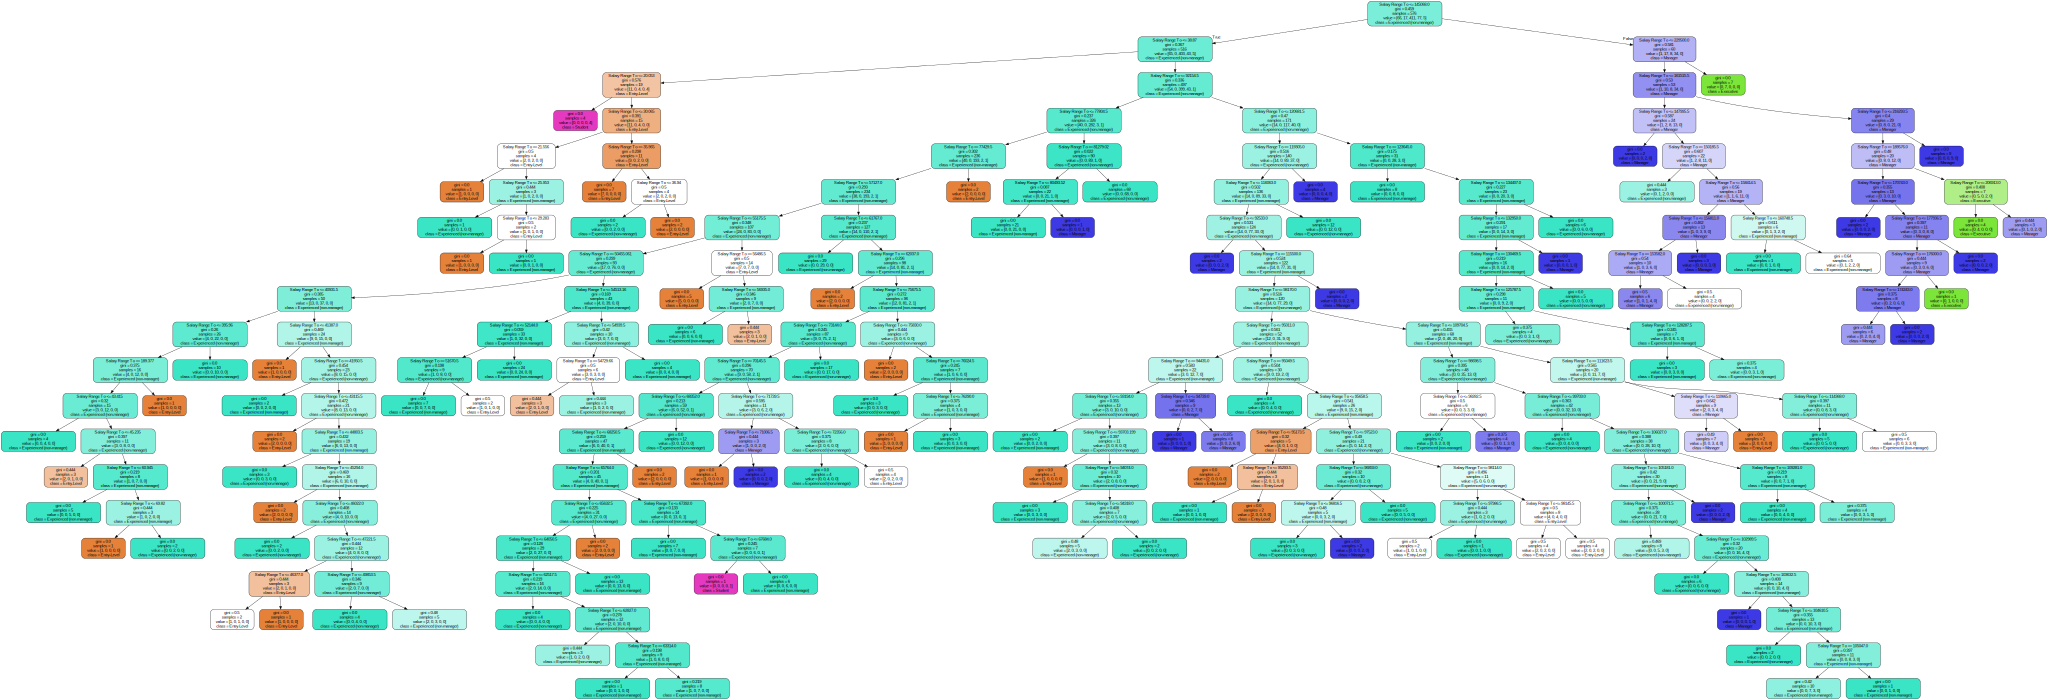

In [22]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
#!pip install graphviz
from google.colab import files
graph = Source(export_graphviz(clf,
                                out_file=None,
                                feature_names=X_train.columns,
                                class_names=['Entry-Level', 'Executive', 'Experienced (non-manager)', 'Manager', 'Student'],
                                filled=True,rounded=True))
graph
# save to file
png_bytes = graph.pipe(format='png')
with open('tree.png', 'wb') as f:
  f.write(png_bytes)
files.download('tree.png')

# display in notebook
SVG(graph.pipe(format='svg'))